In [10]:
# Imports
import cv2 as cv
import os
from google.colab import drive
from google.colab.patches import cv2_imshow

In [11]:
# Mount Google Drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/comvis/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Load images
image1 = cv.imread(filename='stalin.jpeg', flags=cv.IMREAD_GRAYSCALE)
image2 = cv.imread(filename='stalin2.jpeg', flags=cv.IMREAD_GRAYSCALE)

In [13]:
#Code below for ORB-ORB Feature Matching

if image1 is None or image2 is None:
    print("One or both images failed to load.")
else:
    # ORB is a feature detector and descriptor
    # Initiate ORB detector
    orb = cv.ORB_create()

    # Find keypoints and descriptors for both images
    keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(image2, None)

In [14]:
#Code below for ORB-FREAK feature matching
# Check if images are loaded successfully
if image1 is None or image2 is None:
    print("One or both images failed to load.")
else:
    # ORB is a feature detector and descriptor
    # Initiate ORB detector
    orb = cv.ORB_create()

    # Find keypoints and descriptors for both images using ORB
    keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(image2, None)

    # FREAK is a feature descriptor
    # Initiate FREAK descriptor
    freak = cv.xfeatures2d.FREAK_create()

    # Compute descriptors for keypoints using FREAK
    descriptors1 = freak.compute(image1, keypoints1)
    descriptors2 = freak.compute(image2, keypoints2)

In [15]:
# Code below for BRISK-ORB feature matching
# Check if images are loaded successfully
if image1 is None or image2 is None:
    print("One or both images failed to load.")
else:
    # BRISK is a feature detector and descriptor
    # Initiate BRISK detector
    brisk = cv.BRISK_create()

    # Find keypoints and descriptors for both images using BRISK
    keypoints1, descriptors1 = brisk.detectAndCompute(image1, None)
    keypoints2, descriptors2 = brisk.detectAndCompute(image2, None)

    # ORB is a feature descriptor
    # Initiate ORB descriptor
    orb = cv.ORB_create()

    # Compute descriptors for keypoints using ORB
    keypoints1, descriptors1 = orb.compute(image1, keypoints1)
    keypoints2, descriptors2 = orb.compute(image2, keypoints2)

In [16]:
# Code below for BRIEF-ORB feature matching
# Check if images are loaded successfully

if image1 is None or image2 is None:
    print("One or both images failed to load.")
else:
    # BRIEF is a feature descriptor
    # Initiate BRIEF descriptor
    brief = cv.xfeatures2d.BriefDescriptorExtractor_create()

    # ORB is a feature detector
    # Initiate ORB detector
    orb = cv.ORB_create()

    # Detect keypoints for both images using ORB
    keypoints1 = orb.detect(image1, None)
    keypoints2 = orb.detect(image2, None)

    # Compute descriptors for keypoints using BRIEF
    keypoints1, descriptors1 = brief.compute(image1, keypoints1)
    keypoints2, descriptors2 = brief.compute(image2, keypoints2)

In [17]:
# Initialize a matcher
matcher = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Perform descriptor matching between the two images
matches = matcher.match(descriptors1, descriptors2)

# Sort matches based on score
matches = sorted(matches, key=lambda x: x.distance)

# Draw matching result
result = cv.drawMatches(image1, keypoints1, image2, keypoints2, matches[:10], None)

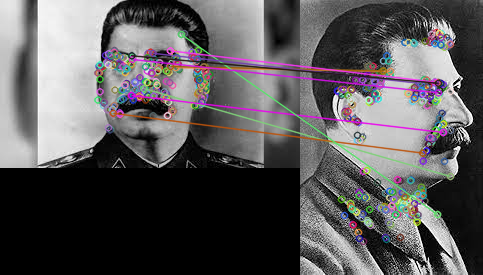

In [18]:
# Display the result
cv2_imshow(result)